In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
from math import sqrt
from math import pi
from random import sample

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import data from csv file
path_to_file = '/content/drive/MyDrive/data.csv'
source_df = pd.read_csv(path_to_file, engine='python')

source_df.head()

,station_id,product_id,date,hour,price,volume,discount_bonusy_rub,month_num,weekday,quarter_num,...,year,region_name,station_size,location,station_type,n_competitors,trk,year_month,closeness_mean,closeness_sum
0,15690,Diesel winter,2016-01-11,6,35.9,0.027767,55.011,1,0,1,...,2016,1,Автомат,№1 Столица региона на городской магистрали,автоматическая,19,19.0,2016-01,349.304372,944105.74229
1,15690,Diesel winter,2016-01-11,7,35.9,0.047328,-0.001,1,0,1,...,2016,1,Автомат,№1 Столица региона на городской магистрали,автоматическая,19,19.0,2016-01,349.304372,944105.74229
2,15690,Diesel winter,2016-01-11,9,35.9,0.046284,99.996,1,0,1,...,2016,1,Автомат,№1 Столица региона на городской магистрали,автоматическая,19,19.0,2016-01,349.304372,944105.74229
3,15690,Diesel winter,2016-01-11,11,35.9,0.014315,0.004,1,0,1,...,2016,1,Автомат,№1 Столица региона на городской магистрали,автоматическая,19,19.0,2016-01,349.304372,944105.74229
4,15690,Diesel winter,2016-01-11,12,35.9,0.019987,29.401,1,0,1,...,2016,1,Автомат,№1 Столица региона на городской магистрали,автоматическая,19,19.0,2016-01,349.304372,944105.74229


0 'station_id' - station number

1 'product_id' - type of petroleum product 

2 'date' - date

3 'hour' - hour

4 'price' - fuel price

5 'volume' - volume of fuel sold

6 'discount_bonusy_rub' - amount of bonuses for fuel purchase

7 'month_num' - number of the month

8 'weekday' - day of the week

9 'quarter_num' - number of quarter

10 'covid_index' - covid index 

11 'very_cold' - very cold weather (1/0)

12 'cold' - cold weather (1/0)

13 'warm' - warm weather (1/0)

14 'hour_downtime' - downtime

15 'discount' - direct discount

16 'trend' - trend

17 'yhat' - weather forecast

18'is_holiday' - holiday (1/0)

19 'big_competitor_mean_price' - average price of big competitors

20 'not_big_competitor_mean_price' - average price of small competitors

21'big_competitor_min_price' - the minimum price of large competitors

22'not_big_competitor_min_price' - minimum price of non-large competitors

23 'big_competitor_unique' - the number of large competitors

24 'not_big_competitor_unique' - the number of non-big competitors

25 'region_mean' - average price in the region

26 'big_competitor_mean_price_reserve'

27 'not_big_competitor_mean_price_reserve'

28 'big_competitor_min_price_reserve'

29 'not_big_competitor_min_price_reserve'

30 'big_competitor_unique_reserve'

31 'not_big_competitor_unique_reserve'

32 'cost' - the cost of fuel

33 'traf' - the traffic at the petrol station

Ratio of competitors' prices to our prices:

34 'big_competitor_mean_price_relative'

35 'not_big_competitor_mean_price_relative'

36 'big_competitor_min_price_relative'

37 'not_big_competitor_min_price_relative'

38 'big_competitor_mean_price_reserve_relative'

39 'not_big_competitor_mean_price_reserve_relative'

40 'big_competitor_min_price_reserve_relative'

41 'not_big_competitor_min_price_reserve_relative'

42 'margin' - indentation

43 'profit' - income

44 'day' - day

45 'year' - year

46 'region_name' - name of the region

47 'station_size' - station size

48 'location' - station location

49 'station_type' - station type

50 'n_competitors' - number of competitors nearby

51 'trk' - the number of guns at the filling station

52 'year_month' - year month

53'closeness_mean' - the degree of similarity of the station to other stations

54 'closeness_sum' - the degree of similarity of the station to other stations

In [ ]:
#different stations
source_df.station_id.unique()

array([15690, 29330, 58810, 58980])

In [ ]:
# choose variables for future analysis -'month_num'(discrete); 'discount_bonusy_rub', "volume" and  'big_competitor_mean_price' (continuous)
# consider only station 15690
df = source_df.loc[source_df['station_id'] == 15690]
vars = df.iloc[:, [0, 5, 6, 7, 19]]

vars

,station_id,volume,discount_bonusy_rub,month_num,big_competitor_mean_price
0,15690,0.027767,55.011,1,36.78
1,15690,0.047328,-0.001,1,36.78
2,15690,0.046284,99.996,1,36.78
3,15690,0.014315,0.004,1,36.78
4,15690,0.019987,29.401,1,36.78
...,...,...,...,...,...
130187,15690,0.034143,77.080,2,51.03
130188,15690,0.002713,0.000,2,51.03
130189,15690,0.009954,22.500,2,51.03
130190,15690,0.026756,55.270,2,51.03


In [ ]:
def statistics(data):
    # Calculation of sample mean, variance, standard deviation, median
    mean = data.mean()
    var = data.var()
    std = data.std()
    median = data.median()

    # Calculate a truncated mean, truncated by 10% of the highest and lowest values
    trimmed_mean = scipy.stats.trim_mean(data, proportiontocut=0.1)

    # Calculation of the MAD-characteristic (Median Absolute Deviation)
    mad_value = scipy.stats.median_abs_deviation(data)

    print(f'Volume: Average = {mean}, variance = {var}, standard deviation = {std},\n'
      f'median = {median}, truncated mean {trimmed_mean}, MAD = {mad_value}')
    
    # Calculation of the 95% confidence interval for the sample mean
    norm_q95 = scipy.stats.norm.ppf(0.95)
    mean_conf = norm_q95 * std / np.sqrt(len(vars))

    # Calculation of 95% confidence intervals for variance and standard deviation
    chi2_q95_left = scipy.stats.chi2.ppf((1 - 0.05 / 2.0), df=len(vars) - 1)
    chi2_q95_right = scipy.stats.chi2.ppf(0.05 / 2.0, df=len(vars) - 1)

    var_conf_left = var * (len(vars) - 1) / chi2_q95_left
    var_conf_right = var * (len(vars) - 1) / chi2_q95_right
    std_conf_left = np.sqrt(var_conf_left)
    std_conf_right = np.sqrt(var_conf_right)


    print("Sample mean: %0.3f +/- %0.3f" % (mean, mean_conf))
    print("95%% Confidence interval of sample variance : (%0.3f; %0.3f)"
      % (var_conf_left, var_conf_right))
    print("95%% Confidence interval of sample standard deviation: (%0.3f; %0.3f)"
      % (std_conf_left, std_conf_right))

In [ ]:
def kde_plot(data, name):
    #Plotting a histogram and kernel density estimate
    plt.figure(figsize=(10, 8))

    kernel = scipy.stats.gaussian_kde(data)

    min_v, max_v = data.min(), data.max()
    x = np.linspace(min_v, max_v, 1000)
    kde_values = kernel(x)

    sns.distplot(data, kde=False, norm_hist=True, label=name)
    plt.plot(x, kde_values)

    plt.ylabel('pdf')
    plt.xlabel(name)
    plt.legend()
    plt.show()
    return kde_values, x


In [ ]:
# Calculating confidence intervals for 25%, 50% and 75% quantiles
def conf_intervals(data, qn):
    # 95% quantile of Gaussian distribution
    norm_q95 = scipy.stats.norm.ppf(0.95)
    kernel = scipy.stats.gaussian_kde(data)

    p25 = len(data[data < qn[5]]) / len(data)
    sigma25 = \
        (sqrt((p25 * (1 - p25)) / len(data))) / kernel(qn[5])
    p50 = len(data[data < qn[10]]) / len(data)
    sigma50 = \
        (sqrt((p50 * (1 - p50)) / len(data))) / kernel(qn[10])
    p75 = len(data[data < qn[15]]) / len(data)
    sigma75 = \
        (sqrt((p75 * (1 - p75)) / len(data))) / kernel(qn[15])

    conf_q25 = norm_q95 * sigma25
    conf_q50 = norm_q95 * sigma50
    conf_q75 = norm_q95 * sigma75

    return [conf_q25, conf_q50, conf_q75]

In [ ]:
#order statistics and boxplot
def qn(data, values, interval):
    percs = np.linspace(0, 100, 21)
    qn = np.percentile(data, percs)
    conf = conf_intervals(data, qn)
    print(f'25%, 50%, 75% - confidence intervals: {conf}')

    q = np.array([10, 25, 50, 75, 90])
    q_text = ["0.1", "0.25", "0.5", "0.75", "0.9"]
    quantiles = np.percentile(data, q)
    print(q)
    print(quantiles)
    print("Max:", max(data))
    print("Min:", min(data))

    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
    fig.set_size_inches(16.0, 10.0)
    sns.boxplot(data, ax=ax2)
    ax1.plot(interval, values)
    ax1.vlines(quantiles, 0, values.max(), color='purple', ls=':', clip_on=False, zorder=0)
    for i in range(len(quantiles)):
        ax1.text(quantiles[i], 0, q_text[i], fontsize=9, rotation='vertical')
    ax2.vlines(quantiles, -0.5, 0.5, color='purple', ls=':', zorder=0)
    plt.show()

## First variable - "volume" - continious

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


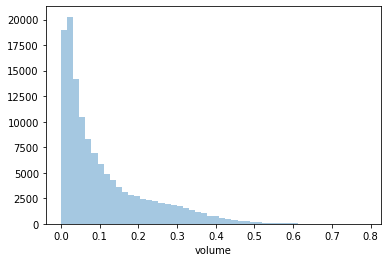

In [ ]:
data0 = vars['volume']
sns.distplot(data0, kde=False)

In [ ]:
statistics(data0)

Volume: Average = 0.10829720570232705, variance = 0.012208487482587885, standard deviation = 0.11049202452026972,
median = 0.0651874704947572, truncated mean 0.08934846894077349, MAD = 0.04811266182171191
Sample mean: 0.108 +/- 0.001
95% Confidence interval of sample variance : (0.012; 0.012)
95% Confidence interval of sample standard deviation: (0.110; 0.111)


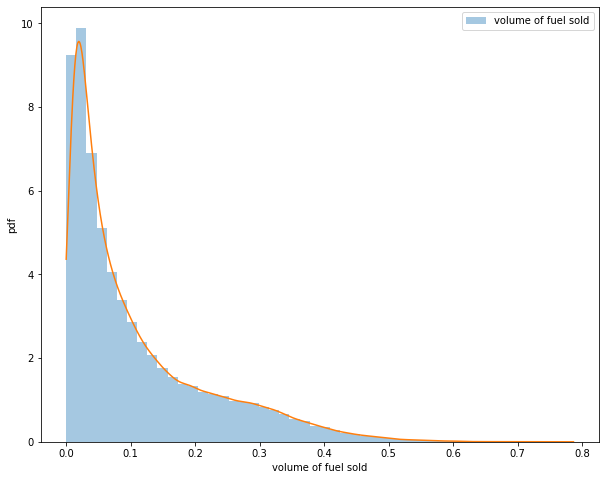

In [ ]:
kde_values0, x0 = kde_plot(data0, "volume of fuel sold")

25%, 50%, 75% - confidence intervals: [array([0.00021556]), array([0.00051143]), array([0.00118938])]
[10 25 50 75 90]
[0.0124936  0.02571195 0.06518747 0.15708425 0.28146838]
Max: 0.7866779257564978
Min: 1.3298137595829704e-05


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


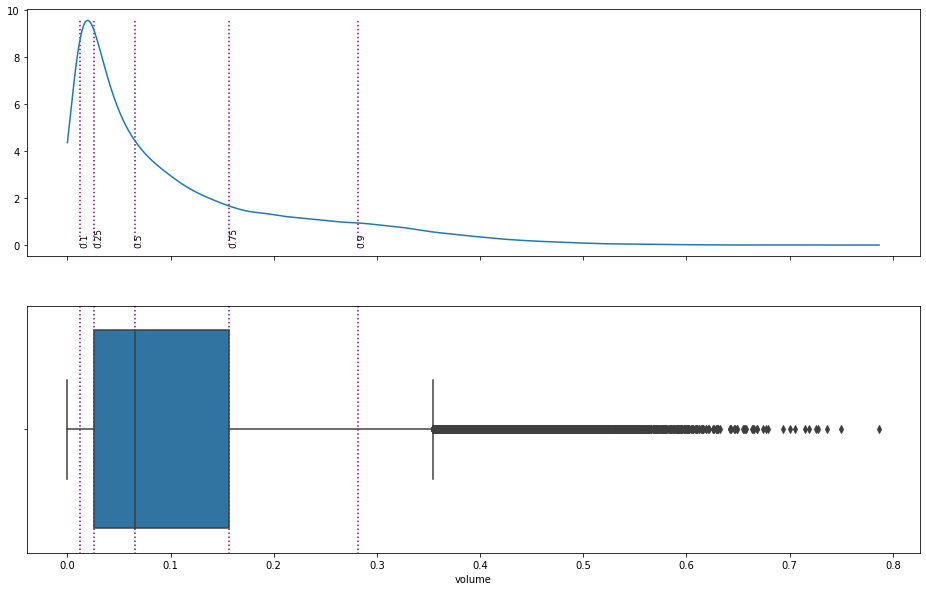

In [ ]:
qn(data0, kde_values0, x0)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


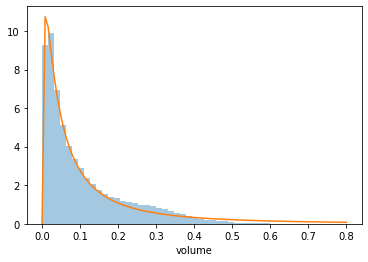

In [ ]:
sns.distplot(data0, kde=False, norm_hist=True, label=f'Volume of fuel sold')
x = np.linspace(0, 0.8, 100)
plt.plot(x, scipy.stats.lognorm.pdf(x, 1.4, 0, 0.07))

In [ ]:
#likelyhood function
def lognorm_like(s, x):
    scale = 0.06
    x = x / scale
    f = (1 / (s * x * sqrt(2* pi))) * np.exp(np.log(x)**2/(-2 * s**2)) / scale
    return -f

In [ ]:
# MLE for parameter s
import scipy.optimize
x0 = [1]
result = scipy.optimize.least_squares(lognorm_like, x0, method ='lm', args=(data0, ))
print("s =", result.x)

s = [1.00611475]


In [ ]:
# Determination of the parameters of the lognormal distribution
# The distribution parameters are determined using the fit function based on the maximum likelihood method
params0 = scipy.stats.lognorm.fit(data0)
pdf = scipy.stats.lognorm.pdf(x, *params0)

params0

(1.1565311211152207, -0.0009476971908157824, 0.06203899537402011)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


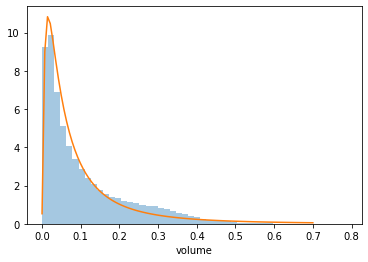

In [ ]:
sns.distplot(data0, kde=False, norm_hist=True, label=f'Volume of fuel sold')
x = np.linspace(0, 0.7, 100)
plt.plot(x, scipy.stats.lognorm.pdf(x, *params0))

In [ ]:
# Calculation of the Kolmogorov-Smirnov test, chi-square and Cramer-von Mises test
ks = scipy.stats.kstest(data0, 'lognorm', params0, N=100)
cr = scipy.stats.cramervonmises(data0,'lognorm', params0)
print(ks)
print(cr)

KstestResult(statistic=0.041920786627990037, pvalue=3.0498707766678157e-199)
CramerVonMisesResult(statistic=80.40311453797413, pvalue=3.888357469339354e-08)


In [ ]:
# Reducing the sample
for i in range(2, 150, 10):
    print("size of sample:", len(data0)/i)
    data0s = sample(list(data0),int(len(data0)/i))
    ks = scipy.stats.kstest(data0s, 'lognorm', params0, N=100)
    cr = scipy.stats.cramervonmises(data0s,'lognorm', params0)
    print(ks)
    print(cr)

size of sample: 65096.0
KstestResult(statistic=0.041667742536299235, pvalue=1.2125461232147102e-98)
CramerVonMisesResult(statistic=40.487897531690045, pvalue=1.2705462015816238e-08)
size of sample: 10849.333333333334
KstestResult(statistic=0.0449460538887968, pvalue=1.7512234391788787e-19)
CramerVonMisesResult(statistic=7.711003135759797, pvalue=1.1744586414508262e-09)
size of sample: 5917.818181818182
KstestResult(statistic=0.044809266280851245, pvalue=9.215012984740136e-11)
CramerVonMisesResult(statistic=3.5947017277407545, pvalue=3.680012961027046e-09)
size of sample: 4068.5
KstestResult(statistic=0.051552026926732886, pvalue=7.773106421882401e-10)
CramerVonMisesResult(statistic=3.412345901386187, pvalue=9.200336270609455e-09)
size of sample: 3099.809523809524
KstestResult(statistic=0.0518099567757464, pvalue=1.1397573981985783e-07)
CramerVonMisesResult(statistic=2.3498144503504452, pvalue=2.091900924039436e-06)
size of sample: 2503.6923076923076
KstestResult(statistic=0.05416393457

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


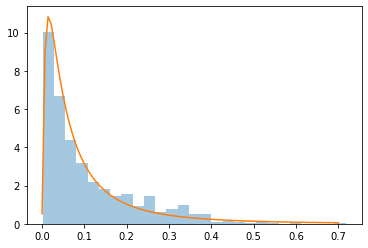

In [ ]:
data0s = sample(list(data0), 1000)
sns.distplot(data0s, kde=False, norm_hist=True, label=f'Volume of fuel sold')
x = np.linspace(0, 0.7, 100)
plt.plot(x, scipy.stats.lognorm.pdf(x, *params0))

In [ ]:
ks = scipy.stats.kstest(data0s, 'lognorm', params0, N=100)
cr = scipy.stats.cramervonmises(data0s,'lognorm', params0)
print(ks)
print(cr)

KstestResult(statistic=0.05249018518160986, pvalue=0.007793507149804083)
CramerVonMisesResult(statistic=0.7284919919328723, pvalue=0.010850926084021717)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(1.7926641083623434, 0.7382558684690187, -4.0612905865795585e-06, 0.8027015570237941)


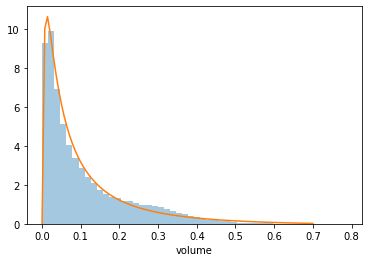

In [ ]:
# test another theoretical distribution - johnsonsb
sns.distplot(data0, kde=False, norm_hist=True, label=f'Volume of fuel sold')
x = np.linspace(0, 0.7, 100)
params0j = scipy.stats.johnsonsb.fit(data0)
print(params0j)
plt.plot(x, scipy.stats.johnsonsb.pdf(x, *params0j))

In [ ]:
ks = scipy.stats.kstest(data0s, 'johnsonsb', params0j, N=100)
cr = scipy.stats.cramervonmises(data0s,'johnsonsb', params0j)
print(ks)
print(cr)

KstestResult(statistic=0.038937353216000115, pvalue=0.09390179956502154)
CramerVonMisesResult(statistic=0.21896034725000585, pvalue=0.23357821876417983)


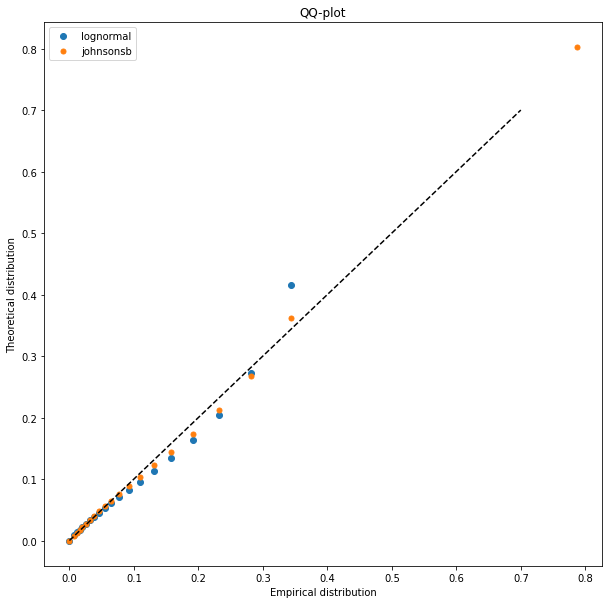

In [ ]:
# Plotting a quantile biplot for empirical and theoretical distribution

# Calculation of quantiles
percs = np.linspace(0, 100, 21)
qn_first = np.percentile(data0, percs)
qn_lognorm = scipy.stats.lognorm.ppf(percs / 100.0, *params0)
qn_john = scipy.stats.johnsonsb.ppf(percs / 100.0, *params0j)

# Building a quantile biplot
plt.figure(figsize=(10, 10))
plt.plot(qn_first, qn_lognorm, ls="", marker="o", markersize=6, label='lognormal')
plt.plot(qn_first, qn_john, ls="", marker="o", markersize=5, label='johnsonsb')
plt.plot(x, x, color="k", ls="--")
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical distribution')

plt.title('QQ-plot')
plt.legend()
plt.show()

## Second variable - "discount_bonusy_rub"- continious

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


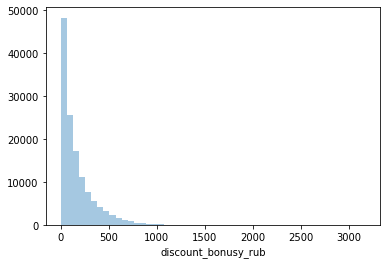

In [ ]:
data1 = vars['discount_bonusy_rub']
sns.distplot(data1, kde=False)

In [ ]:
statistics(data1)

Volume: Average = 162.24356326809635, variance = 32674.609815178726, standard deviation = 180.76119554588792,
median = 101.76, truncated mean 129.6579840524608, MAD = 78.57000000000001
Sample mean: 162.244 +/- 0.824
95% Confidence interval of sample variance : (32425.050; 32927.075)
95% Confidence interval of sample standard deviation: (180.070; 181.458)


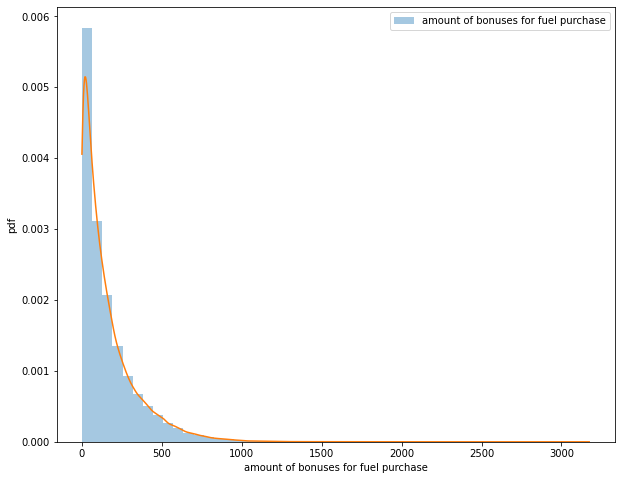

In [ ]:
kde_values1, x1 = kde_plot(data1, "amount of bonuses for fuel purchase")

25%, 50%, 75% - confidence intervals: [array([0.40587834]), array([0.7669294]), array([1.48961329])]
[10 25 50 75 90]
[  6.66   35.71  101.76  225.    404.609]
Max: 3173.56
Min: -0.015


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


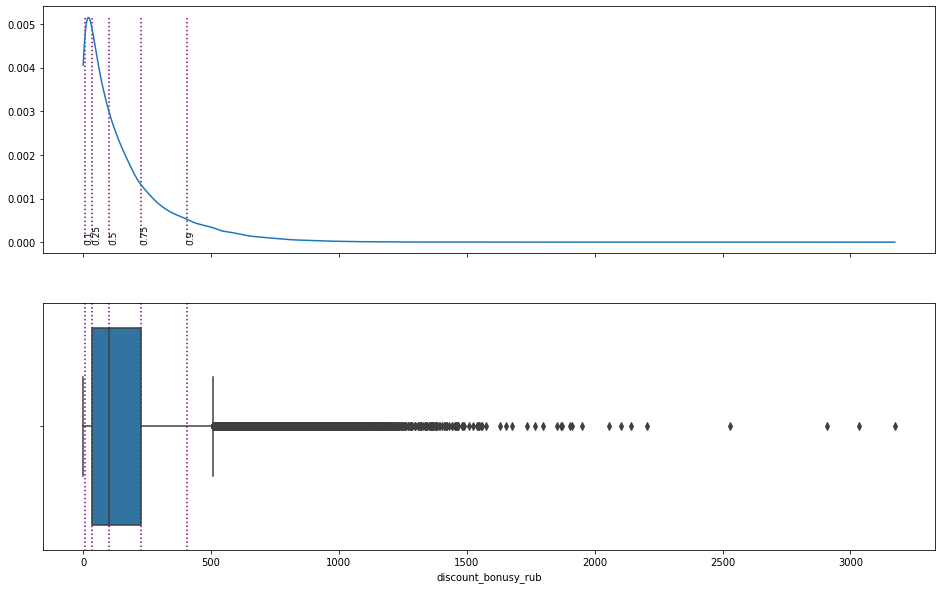

In [ ]:
qn(data1, kde_values1, x1)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


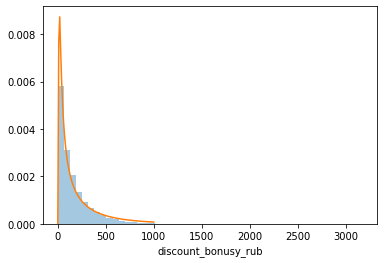

In [ ]:
sns.distplot(data1, kde=False, norm_hist=True, label=f'amount of bonuses for fuel purchase')
x = np.linspace(0, 1000, 100)
plt.plot(x, scipy.stats.fatiguelife.pdf(x, 1.5, 0, 100))

In [ ]:
# Determination of the parameters of the fatiguelife distribution

# The distribution parameters are determined using the fit function based on the maximum likelihood method
params1 = scipy.stats.fatiguelife.fit(data1)
pdf = scipy.stats.fatiguelife.pdf(x, *params1)

params1

(1.2221647090641015, -13.339729159347828, 99.26059574981795)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


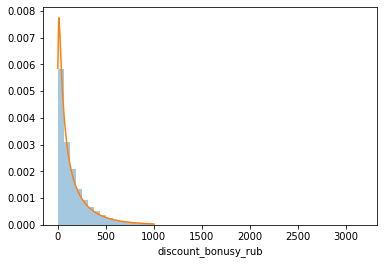

In [ ]:
sns.distplot(data1, kde=False, norm_hist=True, label=f'amount of bonuses for fuel purchase')
x = np.linspace(0, 1000, 100)
plt.plot(x, scipy.stats.fatiguelife.pdf(x, params1[0], params1[1], params1[2]))

In [ ]:
# Calculation of the Kolmogorov-Smirnov test,chi-square
ks = scipy.stats.kstest(data1, 'fatiguelife', params1, N=100)
cr = scipy.stats.cramervonmises(data1,'fatiguelife', params1)
print(ks)
print(cr)

KstestResult(statistic=0.06191751439171822, pvalue=0.0)
CramerVonMisesResult(statistic=132.33930130333243, pvalue=6.004502950407442e-08)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


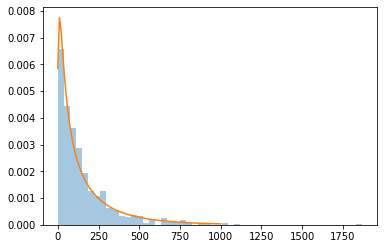

In [ ]:
# Reducing the sample 
data1s = sample(list(data1), 1000)
sns.distplot(data1s, kde=False, norm_hist=True, label=f'amount of bonuses for fuel purchase')
x = np.linspace(0, 1000, 100)
plt.plot(x, scipy.stats.fatiguelife.pdf(x, *params1))

In [ ]:
ks = scipy.stats.kstest(data1s, 'fatiguelife', params1, N=100)
cr = scipy.stats.cramervonmises(data1s,'fatiguelife', params1)
print(ks)
print(cr)

KstestResult(statistic=0.05614974562602926, pvalue=0.003507230613723364)
CramerVonMisesResult(statistic=0.8768395998160847, pvalue=0.004789306400826643)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-0.606599545821028, 61.460082657707595, 73.03754306667278)


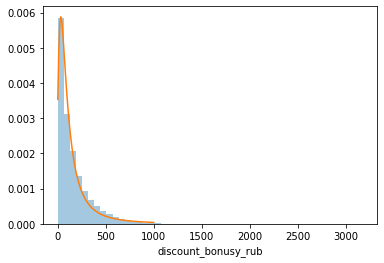

In [ ]:
# test another theoretical distribution - genextreme
sns.distplot(data1, kde=False, norm_hist=True, label=f'amount of bonuses for fuel purchase')
x = np.linspace(0, 1000, 100)
params1j = scipy.stats.genextreme.fit(data1)
print(params1j)
plt.plot(x, scipy.stats.genextreme.pdf(x, *params1j))

In [ ]:
ks = scipy.stats.kstest(data1s, 'genextreme', params1j, N=100)
cr = scipy.stats.cramervonmises(data1s,'genextreme', params1j)
print(ks)
print(cr)

KstestResult(statistic=0.03890482712259426, pvalue=0.09438062177559214)
CramerVonMisesResult(statistic=0.2626670255989239, pvalue=0.17291475136891366)


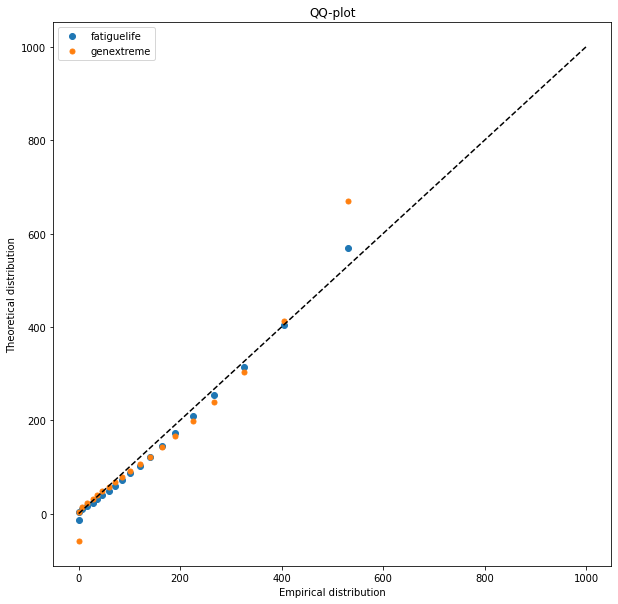

In [ ]:
# Plotting a quantile biplot for empirical and theoretical distributions

# Calculation of quantiles
percs = np.linspace(0, 100, 21)
qn_first = np.percentile(data1, percs)
qn_fatigue = scipy.stats.fatiguelife.ppf(percs / 100.0, *params1)
qn_gen = scipy.stats.genextreme.ppf(percs / 100.0, *params1j)

# Building a quantile biplot
plt.figure(figsize=(10, 10))
plt.plot(qn_first, qn_fatigue, ls="", marker="o", markersize=6, label="fatiguelife")
plt.plot(qn_first, qn_gen, ls="", marker="o", markersize=5, label="genextreme")
plt.plot(x, x, color="k", ls="--")
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical distribution')

plt.title('QQ-plot')
plt.legend()
plt.show()

## Third variable - "big_competitor_mean_price" - continuous

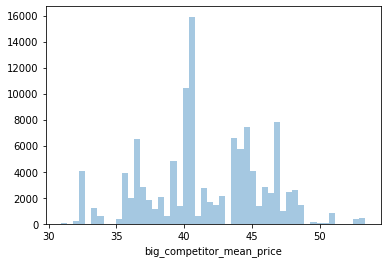

In [ ]:
data2 = vars['big_competitor_mean_price']
data2 = data2.dropna()
sns.distplot(data2, kde=False)

In [ ]:
statistics(data2)

Volume: Average = 41.61706502543142, variance = 18.235221836335185, standard deviation = 4.270271869136107,
median = 40.745000000000005, truncated mean 41.703697822190264, MAD = 3.6016666666666666
Sample mean: 41.617 +/- 0.019
95% Confidence interval of sample variance : (18.096; 18.376)
95% Confidence interval of sample standard deviation: (4.254; 4.287)


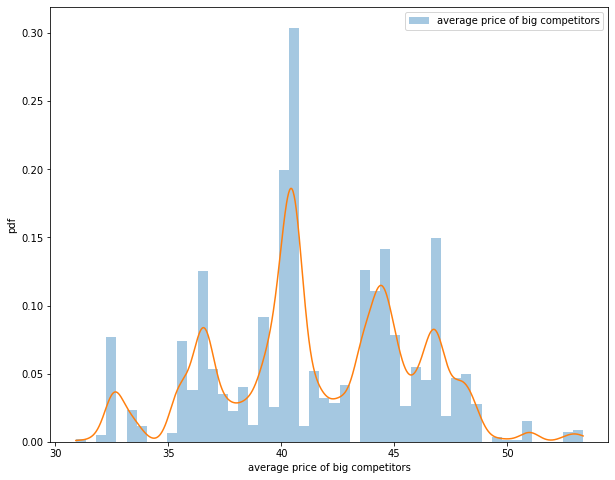

In [ ]:
kde_values2, x2 = kde_plot(data2, "average price of big competitors")

25%, 50%, 75% - confidence intervals: [array([0.03525183]), array([0.01525987]), array([0.02030059])]
[10 25 50 75 90]
[36.15  39.175 40.745 44.73  47.   ]
Max: 53.36000000000001
Min: 30.9


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


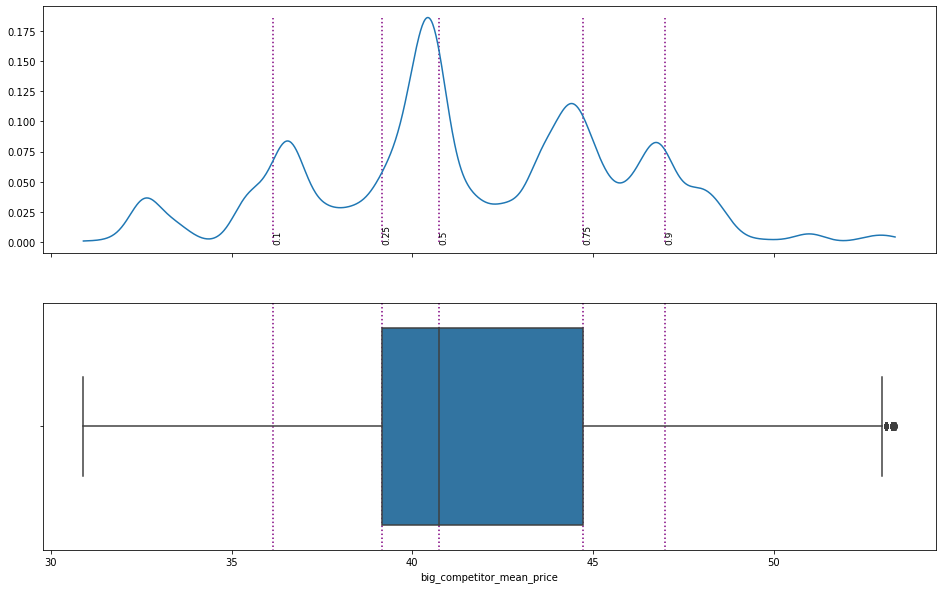

In [ ]:
qn(data2, kde_values2, x2)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


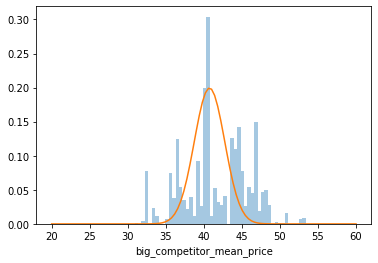

In [ ]:
sns.distplot(data2, kde=False, norm_hist=True, label=f'average price of big competitors')
x = np.linspace(20, 60, 100)
plt.plot(x, scipy.stats.norm.pdf(x, data2.median(), 2))

In [ ]:
# Determination of the parameters of the normal distribution

# The distribution parameters are determined using the fit function based on the maximum likelihood method
params2 = scipy.stats.norm.fit(data2)
pdf = scipy.stats.norm.pdf(x, *params2)

params2

(41.61706502543142, 4.270253534982573)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


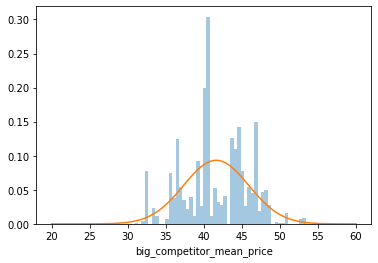

In [ ]:
sns.distplot(data2, kde=False, norm_hist=True, label=f'average price of big competitors')
x = np.linspace(20, 60, 100)
plt.plot(x, scipy.stats.norm.pdf(x, *params2))

In [ ]:
# Calculation of the Kolmogorov-Smirnov test
ks = scipy.stats.kstest(data2, 'norm', params2, N=100)
# shapiro test for normality
sh = scipy.stats.shapiro(data2)
cr = scipy.stats.cramervonmises(data2,'norm', params2)
print(cr)
print(ks)
print(sh)

CramerVonMisesResult(statistic=145.71480364662142, pvalue=3.5700689626771975e-08)
KstestResult(statistic=0.09318454241954266, pvalue=0.0)
ShapiroResult(statistic=0.980842113494873, pvalue=0.0)


/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


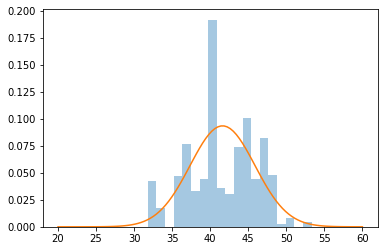

In [ ]:
# Reducing the sample
data2s = sample(list(data2), 1000)
sns.distplot(data2s, kde=False, norm_hist=True, label=f'average price of big competitors')
x = np.linspace(20, 60, 100)
plt.plot(x, scipy.stats.norm.pdf(x, *params2))

In [ ]:
ks = scipy.stats.kstest(data2s, 'norm', params2, N=100)
# shapiro test for normality
sh = scipy.stats.shapiro(data2s)
cr = scipy.stats.cramervonmises(data2s,'norm', params2)
print(cr)
print(ks)
print(sh)

CramerVonMisesResult(statistic=1.4189471894958317, pvalue=0.0002626005721405589)
KstestResult(statistic=0.0913145321385882, pvalue=1.047292733551977e-07)
ShapiroResult(statistic=0.9769775867462158, pvalue=1.727742254820086e-11)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(2.6931186003086975, 41.58302747196062, 6.791472437691873)


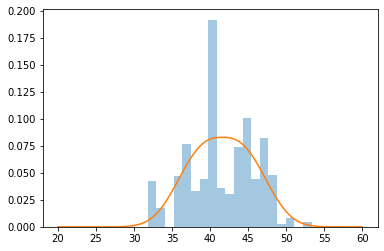

In [ ]:
# test another theoretical distribution - gennorm
sns.distplot(data2s, kde=False, norm_hist=True, label=f'average price of big competitors')
x = np.linspace(20, 60, 100)
params2j = scipy.stats.gennorm.fit(data2)
print(params2j)
plt.plot(x, scipy.stats.gennorm.pdf(x, *params2j))

In [ ]:
ks = scipy.stats.kstest(data2s, 'gennorm', params2j, N=100)
cr = scipy.stats.cramervonmises(data2s,'gennorm', params2j)
print(cr)
print(ks)

CramerVonMisesResult(statistic=1.0696140309737396, pvalue=0.0016852791053046934)
KstestResult(statistic=0.07997954128626439, pvalue=5.188199782326392e-06)


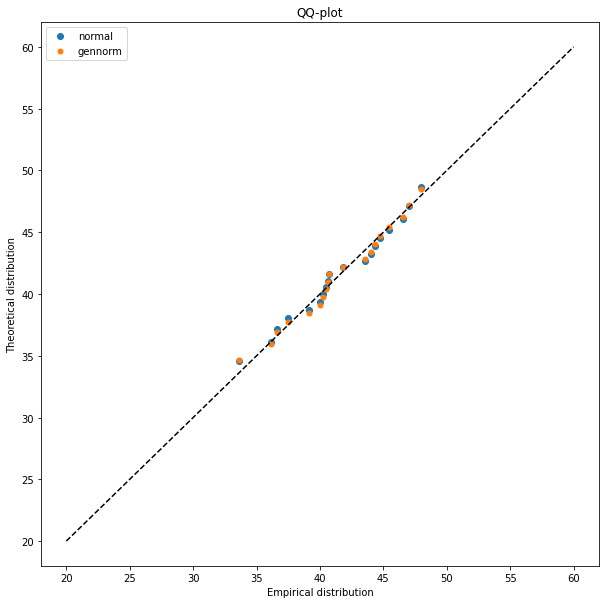

In [ ]:
# Plotting a quantile biplot for empirical and theoretical distribution

# Calculation of quantiles
percs = np.linspace(0, 100, 21)
qn_first = np.percentile(data2, percs)
qn_norm = scipy.stats.norm.ppf(percs / 100.0, *params2)
qn_gennorm = scipy.stats.gennorm.ppf(percs / 100.0, *params2j)

# Building a quantile biplot
plt.figure(figsize=(10, 10))
plt.plot(qn_first, qn_norm, ls="", marker="o", markersize=6, label = "normal")
plt.plot(qn_first, qn_gennorm, ls="", marker="o", markersize=5, label = "gennorm")
plt.plot(x, x, color="k", ls="--")
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical distribution')

plt.title('QQ-plot')
plt.legend()
plt.show()

## Fourt variable - "month" - discrete

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


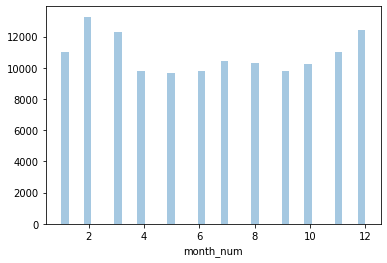

In [ ]:
data3 = vars['month_num']
sns.distplot(data3, kde=False)

In [ ]:
statistics(data3)

Volume: Average = 6.437154356642497, variance = 12.66999867076871, standard deviation = 3.5594941593952236,
median = 6.0, truncated mean 6.407992011828639, MAD = 3.0
Sample mean: 6.437 +/- 0.016
95% Confidence interval of sample variance : (12.573; 12.768)
95% Confidence interval of sample standard deviation: (3.546; 3.573)


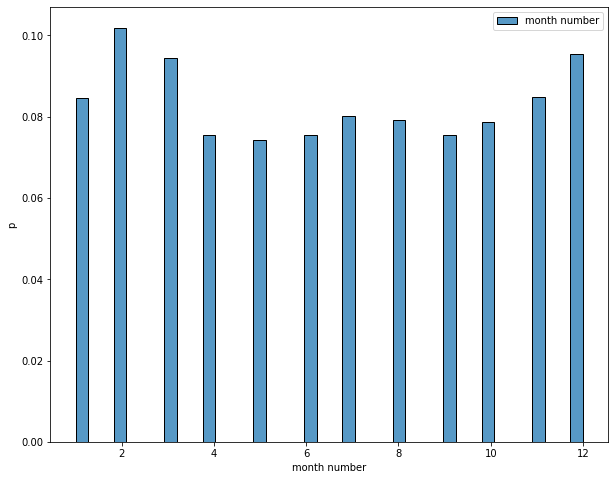

In [ ]:
#Plotting a probability law
plt.figure(figsize=(10, 8))
sns.histplot(data3, kde=False, stat='probability', label="month number")
plt.ylabel('p')
plt.xlabel("month number")
plt.legend()
plt.show()

In [ ]:
# probability law
data3.value_counts(normalize=True, sort=False)

1     0.084583
2     0.101934
3     0.094437
4     0.075496
12    0.095344
11    0.084821
5     0.074198
6     0.075496
7     0.080212
8     0.079252
9     0.075481
10    0.078745
Name: month_num, dtype: float64

25%, 50%, 75% - confidence intervals: [array([0.01555032]), array([0.02467732]), array([0.02093184])]
[10 25 50 75 90]
[ 2.  3.  6. 10. 11.]
Max: 12
Min: 1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


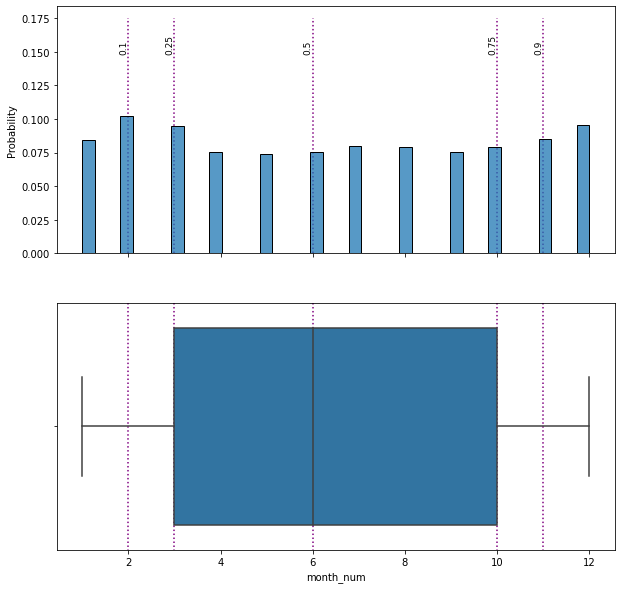

In [ ]:
percs = np.linspace(0, 100, 21)
qn = np.percentile(data3, percs)
conf = conf_intervals(data3, qn)
print(f'25%, 50%, 75% - confidence intervals: {conf}')

q = np.array([10, 25, 50, 75, 90])
q_text = ["0.1", "0.25", "0.5", "0.75", "0.9"]
quantiles = np.percentile(data3, q)
print(q)
print(quantiles)
print("Max:", max(data3))
print("Min:", min(data3))

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
fig.set_size_inches(10.0, 10.0)
sns.boxplot(data3, ax=ax2)
sns.histplot(data3, kde=False, stat='probability', label="month number", ax=ax1)
ax1.vlines(quantiles, 0, 0.175, color='purple', ls=':', clip_on=False, zorder=0)
for i in range(len(quantiles)):
    ax1.text(quantiles[i]-0.2, 0.15, q_text[i], fontsize=9, rotation='vertical')
ax2.vlines(quantiles, -0.5, 0.5, color='purple', ls=':', zorder=0)
plt.show()

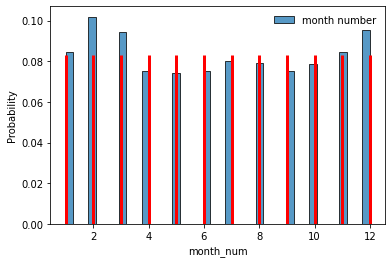

In [ ]:
sns.histplot(data3, kde=False, stat='probability', label="month number")
x = np.linspace(1, 12, 12)
plt.vlines(x, 0, scipy.stats.randint.pmf(1, 1, 13), colors='red', linestyles='solid', lw=3)
plt.legend(loc='best', frameon=False)
plt.show()

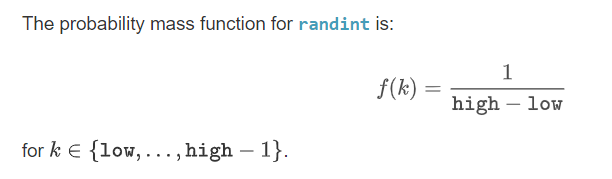

In [ ]:
# uniform discrete random variable 
prob = scipy.stats.randint.pmf(0, 0, 12)
print(prob)
params3 = [0, 12]

0.08333333333333333


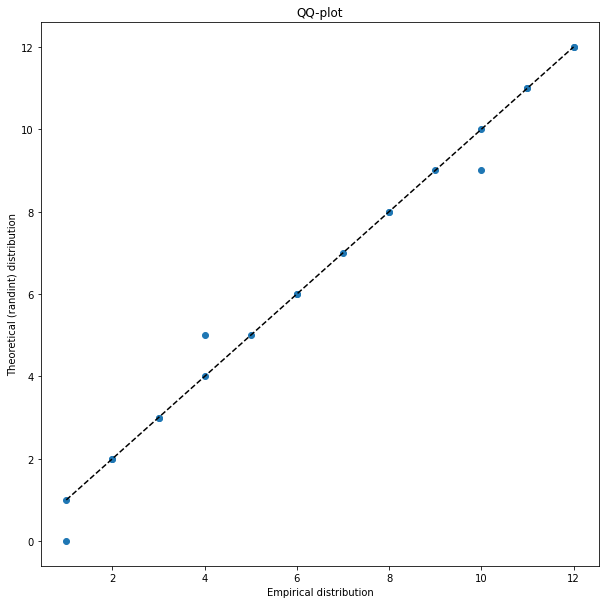

In [ ]:
# Plotting a quantile biplot for empirical and theoretical (randint) distribution

# Calculation of quantiles
percs = np.linspace(0, 100, 21)
qn_first = np.percentile(data3, percs)
qn_randint = scipy.stats.randint.ppf(percs / 100.0, 1, 13)

# Building a quantile biplot
plt.figure(figsize=(10, 10))
plt.plot(qn_first, qn_randint, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (randint) distribution')

plt.title('QQ-plot')
plt.show()

In [ ]:
# Calculation of the chi-square
freq = np.array(data3.value_counts(normalize=True, sort=False))
prob = scipy.stats.randint.pmf(1, 1, 13)
prob_array = [prob]*12
chi2 = scipy.stats.chisquare(freq, prob_array)
ttest = scipy.stats.ttest_rel(freq,prob_array)
print(chi2)
print(ttest)

Power_divergenceResult(statistic=0.011192602407321391, pvalue=0.9999999999999986)
Ttest_relResult(statistic=1.7402475795449975e-15, pvalue=0.9999999999999987)
